**Generating Data**

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generate mock product review data
np.random.seed(42)
num_reviews = 1000

products = [f'Product_{chr(65 + i)}' for i in range(5)]  # Product_A, Product_B, ...
users = [f'User_{100 + i}' for i in range(100)]

positive_phrases = [
    "love this product", "excellent quality", "works perfectly", "highly recommend",
    "great value", "very satisfied", "easy to use", "fantastic", "amazing features",
    "best purchase ever", "exceeded expectations", "five stars", "wonderful experience"
]

negative_phrases = [
    "terrible product", "poor quality", "does not work", "would not recommend",
    "waste of money", "very disappointed", "difficult to use", "awful", "missing features",
    "worst purchase", "broke easily", "one star", "bad experience", "customer service was bad"
]

neutral_phrases = [
    "it's okay", "average product", "works as expected", "nothing special", "decent for the price",
    "met expectations", "neither good nor bad", "could be better", "some pros and cons"
]

review_data = []
current_date = datetime(2023, 1, 1)

for i in range(num_reviews):
    rating = np.random.randint(1, 6)
    product_id = np.random.choice(products)
    user_id = np.random.choice(users)
    review_date = current_date + timedelta(days=np.random.randint(0, 365 * 2))  # Reviews over 2 years

    if rating >= 4:
        text = f"{np.random.choice(positive_phrases)}. {np.random.choice(positive_phrases)}."
        if np.random.rand() < 0.3:
            text += f" {np.random.choice(neutral_phrases)}."
    elif rating <= 2:
        text = f"{np.random.choice(negative_phrases)}. {np.random.choice(negative_phrases)}."
        if np.random.rand() < 0.3:
            text += f" {np.random.choice(neutral_phrases)}."
    else:  # rating == 3
        text = f"{np.random.choice(neutral_phrases)}."
        if np.random.rand() < 0.5:
            text += f" {np.random.choice(positive_phrases)}."
        else:
            text += f" {np.random.choice(negative_phrases)}."

    review_data.append({
        'ReviewID': f'REV{2000 + i}',
        'ProductID': product_id,
        'UserID': user_id,
        'Rating': rating,
        'ReviewText': text,
        'ReviewDate': review_date.strftime('%Y-%m-%d')
    })

df_reviews = pd.DataFrame(review_data)

In [ ]:
# CSV File
df_reviews.to_csv('product_reviews_mock_data.csv', index=False)
print("Mock product review data generated: product_reviews_mock_data.csv")
print(df_reviews.head())

Mock product review data generated: product_reviews_mock_data.csv
  ReviewID  ProductID    UserID  Rating  \
0  REV2000  Product_E  User_114       4   
1  REV2001  Product_C  User_186       2   
2  REV2002  Product_E  User_101       3   
3  REV2003  Product_A  User_175       5   
4  REV2004  Product_C  User_158       1   

                              ReviewText  ReviewDate  
0       fantastic. wonderful experience.  2023-04-17  
1                   broke easily. awful.  2023-11-27  
2          met expectations. five stars.  2023-12-10  
3  very satisfied. wonderful experience.  2023-11-10  
4              worst purchase. one star.  2024-05-25  


In [ ]:
text_data = pd.read_csv('/content/reviews.csv')

**Text Preprocessing**

In [ ]:
# Step 1-----> Converting into lowercase, removing punctuations, speical letters and numbers

In [ ]:
import re
# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation, numbers, and special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply cleaning to ReviewText column
text_data['CleanedReviewText'] = text_data['ReviewText'].apply(clean_text)

In [ ]:
print(text_data['CleanedReviewText'])

0                        fantastic wonderful experience
1                                    broke easily awful
2                           met expectations five stars
3                   very satisfied wonderful experience
4                               worst purchase one star
                             ...                       
995                      average product worst purchase
996                       met expectations poor quality
997                        works as expected five stars
998    fantastic excellent quality neither good nor bad
999     waste of money worst purchase works as expected
Name: CleanedReviewText, Length: 1000, dtype: object


In [ ]:
text_data.head()

,ReviewID,ProductID,UserID,Rating,ReviewText,ReviewDate,CleanedReviewText
0,REV2000,Product_E,User_114,4,fantastic. wonderful experience.,2023-04-17,fantastic wonderful experience
1,REV2001,Product_C,User_186,2,broke easily. awful.,2023-11-27,broke easily awful
2,REV2002,Product_E,User_101,3,met expectations. five stars.,2023-12-10,met expectations five stars
3,REV2003,Product_A,User_175,5,very satisfied. wonderful experience.,2023-11-10,very satisfied wonderful experience
4,REV2004,Product_C,User_158,1,worst purchase. one star.,2024-05-25,worst purchase one star


In [ ]:
# Step 2------> Tokentizing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
text_data['Tokens'] = text_data['CleanedReviewText'].apply(word_tokenize)

In [ ]:
print(text_data['Tokens'])

0                     [fantastic, wonderful, experience]
1                                 [broke, easily, awful]
2                       [met, expectations, five, stars]
3               [very, satisfied, wonderful, experience]
4                           [worst, purchase, one, star]
                             ...                        
995                  [average, product, worst, purchase]
996                   [met, expectations, poor, quality]
997                   [works, as, expected, five, stars]
998    [fantastic, excellent, quality, neither, good,...
999    [waste, of, money, worst, purchase, works, as,...
Name: Tokens, Length: 1000, dtype: object


In [ ]:
# Step 3-----> Removing StopWords

In [ ]:
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get English stop words
stop_words = set(stopwords.words('english'))

# Remove stopwords from token list
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Passing to Function
text_data['FilteredTokens'] = text_data['Tokens'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(text_data['FilteredTokens'])

0                     [fantastic, wonderful, experience]
1                                 [broke, easily, awful]
2                       [met, expectations, five, stars]
3                     [satisfied, wonderful, experience]
4                           [worst, purchase, one, star]
                             ...                        
995                  [average, product, worst, purchase]
996                   [met, expectations, poor, quality]
997                       [works, expected, five, stars]
998    [fantastic, excellent, quality, neither, good,...
999     [waste, money, worst, purchase, works, expected]
Name: FilteredTokens, Length: 1000, dtype: object


In [ ]:
# Step 4 -----> Reducing Words to Base form (Stemming)

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Apply stemming
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

text_data['StemmedTokens'] = text_data['FilteredTokens'].apply(stem_tokens)


In [ ]:
print(text_data['StemmedTokens'])

0                          [fantast, wonder, experi]
1                                [broke, easili, aw]
2                          [met, expect, five, star]
3                          [satisfi, wonder, experi]
4                        [worst, purchas, one, star]
                           ...                      
995                [averag, product, worst, purchas]
996                     [met, expect, poor, qualiti]
997                       [work, expect, five, star]
998    [fantast, excel, qualiti, neither, good, bad]
999      [wast, money, worst, purchas, work, expect]
Name: StemmedTokens, Length: 1000, dtype: object


**Sentiment Analysis**

In [ ]:
# Step 1 -----> Using Vander to Score each review

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER if you haven't
nltk.download('vader_lexicon')

# Initialize the analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment scoring
text_data['SentimentScores'] = text_data['CleanedReviewText'].apply(sia.polarity_scores)

# Split compound score (summary sentiment)
text_data['Compound'] = text_data['SentimentScores'].apply(lambda score: score['compound'])

# Optional: label sentiment
def label_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

text_data['SentimentLabel'] = text_data['Compound'].apply(label_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
print(text_data['SentimentLabel'])

0      Positive
1      Negative
2       Neutral
3      Positive
4      Negative
         ...   
995    Negative
996    Negative
997     Neutral
998    Positive
999    Negative
Name: SentimentLabel, Length: 1000, dtype: object


In [ ]:
# Step 2 -----> Feature Extraction (TF IDf Vectorization)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # You can tweak this

# Transform the text data into TF-IDF features
X = vectorizer.fit_transform(text_data['CleanedReviewText'])

# Labels (target)
y = text_data['SentimentLabel']

In [ ]:
# Step 3 ----> Spliting Data and Model Training

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ----------------------------------------- LOGISTIC REGRESSION -------------------------------------------#

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# -------------------------------------------- NAIVE BASIS -----------------------------------------------#

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = lr_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.915
              precision    recall  f1-score   support

    Negative       0.88      0.98      0.93        95
     Neutral       0.00      0.00      0.00         4
    Positive       0.96      0.89      0.92       101

    accuracy                           0.92       200
   macro avg       0.61      0.62      0.62       200
weighted avg       0.90      0.92      0.91       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
results_df = pd.DataFrame({
    'PredictedSentiment': y_pred,
    'ActualSentiment': y_test

print(results_df.head())


    PredictedSentiment ActualSentiment
521           Negative        Negative
737           Positive        Positive
740           Positive        Positive
660           Negative        Negative
411           Positive        Positive


**Exploratory Data Analysis of Sentiments**

PredictedSentiment
Negative    107
Positive     93
Name: count, dtype: int64


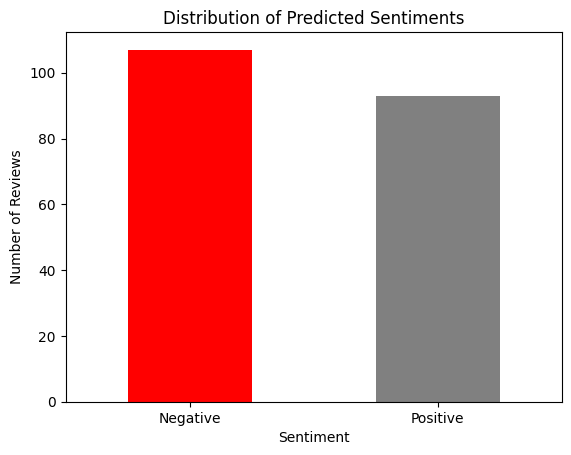

In [ ]:
import matplotlib.pyplot as plt

# Count how many reviews fall into each sentiment category
sentiment_counts = results_df['PredictedSentiment'].value_counts()

print(sentiment_counts)

# Plot a bar chart of the sentiment distribution
sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Distribution of Predicted Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# ------------------------------------------------------ THE END ------------------------------------------------#